In [116]:
import numpy as np

inputname = "input"
xdim = 101
ydim = 103

def read_vectors():
    with open(inputname , 'r' ) as infile:
        for line in infile.readlines():
            p,v = (line.strip().split(" "))
            _,p = p.split('=')
            _,v = v.split('=')
            p = np.array(p.split(',')).astype(int)
            v = np.array(v.split(',')).astype(int)
            yield p,v


In [117]:
def calc_positions(vectors,time,xdim,ydim):
    for p,v in vectors:
        # new position = Postion plus velocity * time
        x,y = p+(time*v)
        # wrapping around
        x = (x % xdim + xdim) % xdim
        y = (y % ydim + ydim) % ydim
        yield x,y


def count_quadrants(vectors,xdim,ydim):
    vectors=np.array(vectors,dtype=int)
    xmid=xdim//2
    ymid=ydim//2
    top_right = (vectors[:,0]>xmid) & (vectors[:,1]>ymid)
    top_left = (vectors[:,0]<xmid) & (vectors[:,1]>ymid)
    bottom_left = (vectors[:,0]<xmid) & (vectors[:,1]<ymid)
    bottom_right = (vectors[:,0]>xmid) & (vectors[:,1]<ymid)
    counts = {
        "top_right": np.sum(top_right),
        "top_left": np.sum(top_left),
        "bottom_left": np.sum(bottom_left),
        "bottom_right": np.sum(bottom_right),
    }
    
    return counts
    


In [118]:
positions = [ (x,y) for x,y in calc_positions(read_vectors(),100,xdim,ydim)]

In [119]:
import math
math.prod(count_quadrants(positions,xdim,ydim).values())

np.int64(231221760)

# Part 2

In [120]:
import numpy as np
from scipy.ndimage import label

def pos_to_binmap(positions,xdim,ydim):
    temp_map = np.full((xdim,ydim),False)
    for x,y in positions:
        temp_map[x,y]=True
    return temp_map
 

def biggest_cluster(positions,xdim,ydim):
    grid = np.array(positions) # Convert to numpy array if not already
    binary_map = pos_to_binmap(grid,xdim,ydim)
    labeled_map, num_features = label(binary_map)
    maxsize = 0
    for cluster_id in range(1, num_features + 1):
        cluster_mask = (labeled_map == cluster_id) # Mask for current cluster
        size = cluster_mask.sum() # Size of the cluster
        if size > maxsize:
            maxsize = size
    
    return maxsize


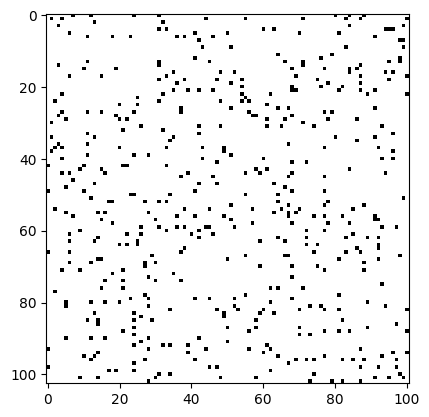

In [121]:
import matplotlib.pyplot as plt

def draw_bitmap_map(points, xdim, ydim, title=None):
    # Initialize a bitmap with all zeros
    bitmap = np.zeros((ydim, xdim), dtype=int)
    
    # Mark positions based on the points
    for point in points:
        # Ensure the point is within the grid bounds
        x, y = point
        if 0 <= x < xdim and 0 <= y < ydim:
            bitmap[y, x] = 1  # Mark the position with a 1
    
    # Plot the bitmap as an image
    plt.imshow(bitmap, cmap='Greys', interpolation='nearest')
    if title:
        plt.title(title)
    plt.show()

positions = [ (x,y) for x,y in calc_positions(read_vectors(),100,xdim,ydim)]
draw_bitmap_map(positions, xdim, ydim)

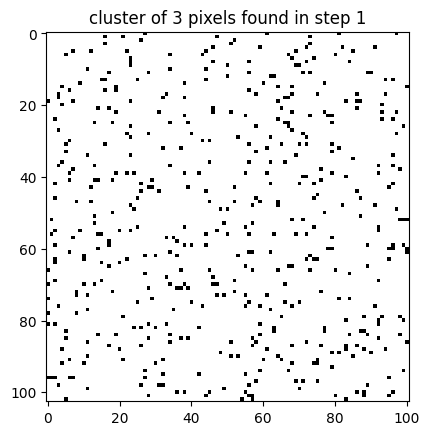

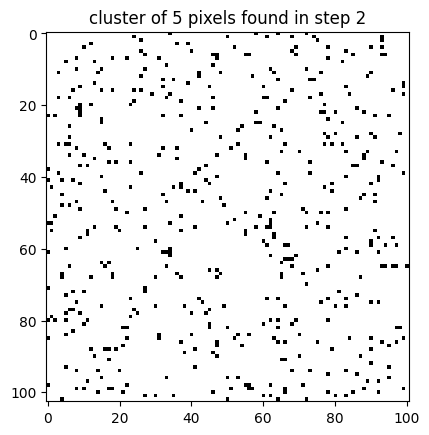

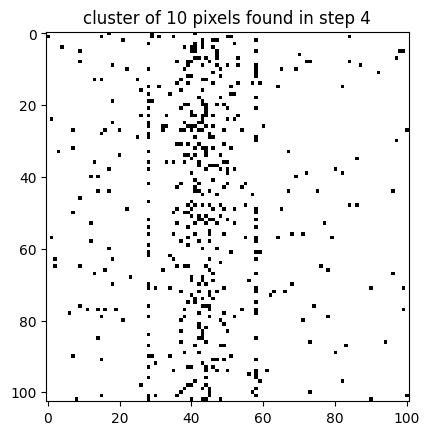

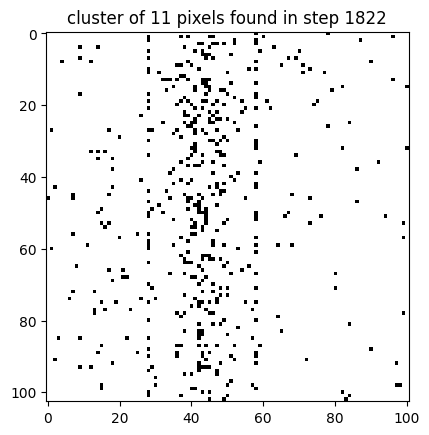

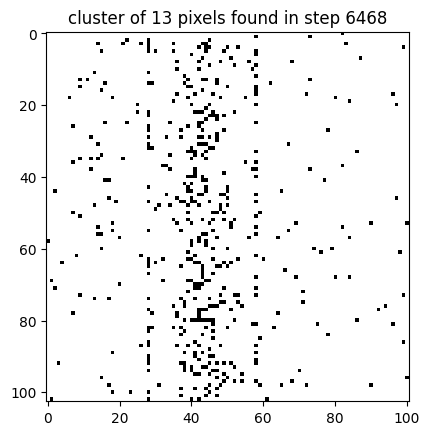

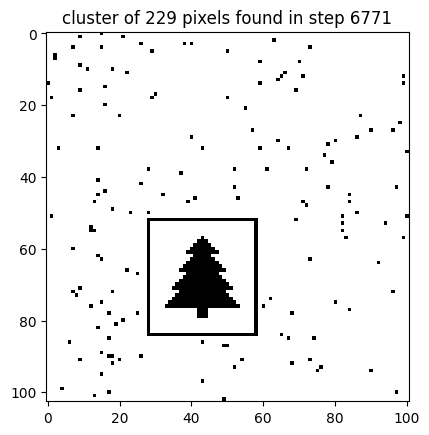

In [122]:
i=0
oldmax=0
while oldmax<100:
    i+=1
    positions = [ (x,y) for x,y in calc_positions(read_vectors(),i,xdim,ydim)]
    max=biggest_cluster(positions,xdim,ydim)
    if max>oldmax:
        draw_bitmap_map(positions,xdim,ydim,f"cluster of {max} pixels found in step {i}")
        oldmax=max
